In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
file = 'movielens/'
movies = pd.read_csv(file + 'movie.csv')
movies = movies.loc[:,["movieId","title"]]
movies.head(10)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
7,8,Tom and Huck (1995)
8,9,Sudden Death (1995)
9,10,GoldenEye (1995)


In [70]:
ratings = pd.read_csv(file + 'rating.csv')
ratings = ratings.loc[:,["userId","movieId","rating"]]

ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [28]:
tag = pd.read_csv(file + 'tag.csv')
tag.tail()
print(movies.shape)

(27278, 3)


In [71]:
df = pd.merge(movies,ratings)
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),3,4.0
1,1,Toy Story (1995),6,5.0
2,1,Toy Story (1995),8,4.0
3,1,Toy Story (1995),10,4.0
4,1,Toy Story (1995),11,4.5


In [72]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Codes of Gender, The (2010)               5.0
Poison (1951)                             5.0
Barchester Chronicles, The (1982)         5.0
Prom Queen: The Marc Hall Story (2004)    5.0
Argentina latente (2007)                  5.0
Name: rating, dtype: float64

In [34]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: rating, dtype: int64

In [59]:
temp = pd.DataFrame(df.groupby('title')['rating'].mean())
temp['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

ratings.head()


,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


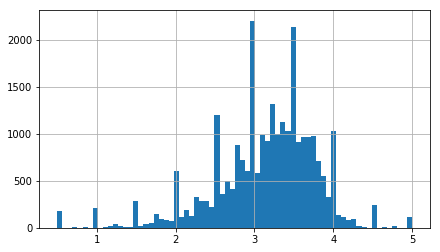

In [52]:
plt.figure(figsize=(7,4))
temp['rating'].hist(bins=70)

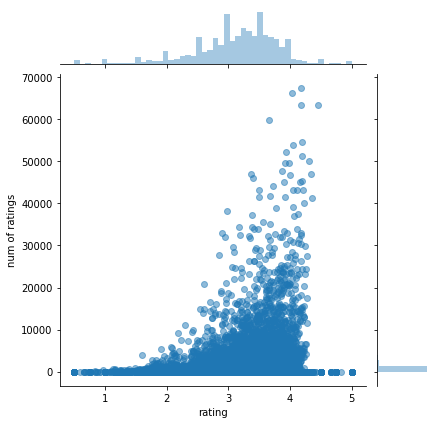

In [54]:
sns.jointplot(x='rating',y='num of ratings',data=temp,alpha=0.5)

In [73]:
data = df.iloc[:1000000,:]

In [74]:
pivot_table = data.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
pivot_table.head(10)

title,Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"Amazing Panda Adventure, The (1995)","American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),...,Unforgettable (1996),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
movies_watched = pivot_table["Casino (1995)"]


In [165]:
similarity_with_other_movies = pivot_table.corrwith(movies_watched)
similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False, )
similarity_with_other_movies['title'] = similarity_with_other_movies.index
print("Similarity of {}".format(similarity_with_other_movies['title'][0]))
        
print(similarity_with_other_movies[1:].head())
    
        

Similarity of Casino (1995)
title
Sonic Outlaws (1995)                   0.581333
Target (1995)                          0.483508
Headless Body in Topless Bar (1995)    0.467925
Shadows (Cienie) (1988)                0.462747
Guardian Angel (1994)                   0.37109
dtype: object
